# Decision Tree Lab 17.10
https://www.kaggle.com/datasets/vallabhadattap/kingcountyhousing

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## 01 Data Exploration

In [11]:
print("\n-------------------------\n")
print("Load and Inspect Data:")
print("\n-------------------------\n")
df = pd.read_csv('KC_housing_data.csv')
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(df.head())



-------------------------

Load and Inspect Data:

-------------------------

Dataset shape: (4600, 18)
Columns: ['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country']
                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     

In [12]:
print("\n-------------------------\n")
print("Summary Statistics:")
print("\n-------------------------\n")
print(df.describe())


-------------------------

Summary Statistics:

-------------------------

              price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.600000e+03  4600.000000  4600.000000   4600.000000  4.600000e+03   
mean   5.519630e+05     3.400870     2.160815   2139.346957  1.485252e+04   
std    5.638347e+05     0.908848     0.783781    963.206916  3.588444e+04   
min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
25%    3.228750e+05     3.000000     1.750000   1460.000000  5.000750e+03   
50%    4.609435e+05     3.000000     2.250000   1980.000000  7.683000e+03   
75%    6.549625e+05     4.000000     2.500000   2620.000000  1.100125e+04   
max    2.659000e+07     9.000000     8.000000  13540.000000  1.074218e+06   

            floors   waterfront         view    condition   sqft_above  \
count  4600.000000  4600.000000  4600.000000  4600.000000  4600.000000   
mean      1.512065     0.007174     0.240652     3.451739  1827.265435   
std     

In [5]:
print("\n-------------------------\n")
print("Missing Values:")
print("\n-------------------------\n")
print(df.isnull().sum())


-------------------------

Missing Values:

-------------------------

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64



-------------------------

Correlation Heatmap:

-------------------------



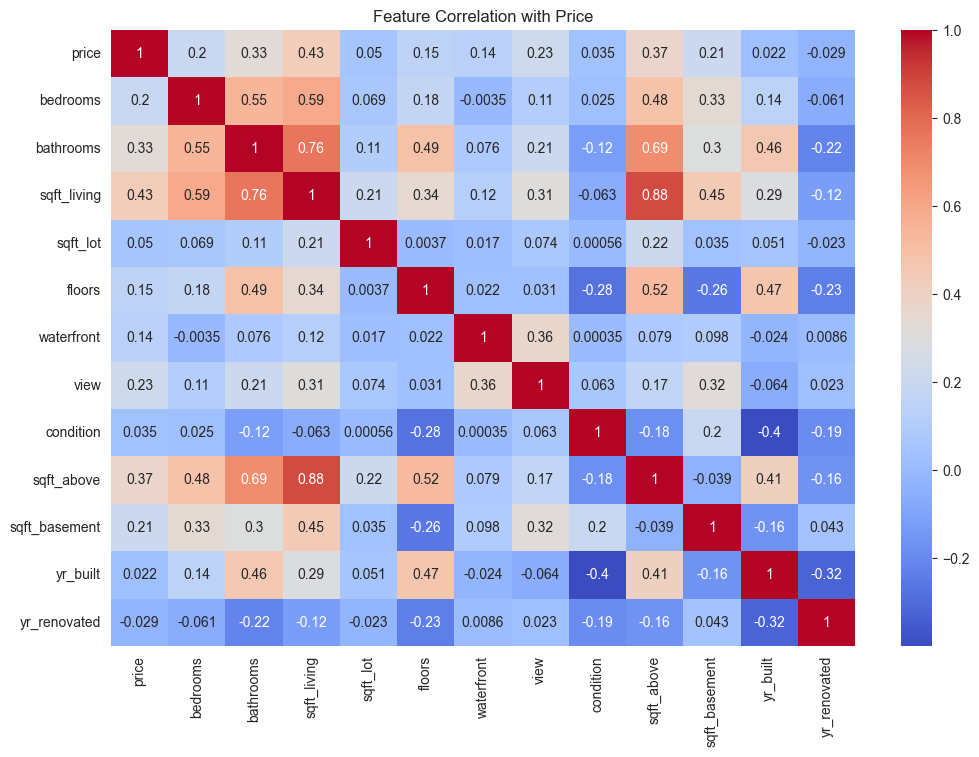


 Top correlated features with price:
price            1.000000
sqft_living      0.430410
sqft_above       0.367570
bathrooms        0.327110
view             0.228504
sqft_basement    0.210427
Name: price, dtype: float64


/var/folders/4g/23r9mqgj2hdgg8pv2_5x0qzm0000gn/T/ipykernel_78807/3463864989.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_corr.head(6).values, y=price_corr.head(6).index, palette="coolwarm")


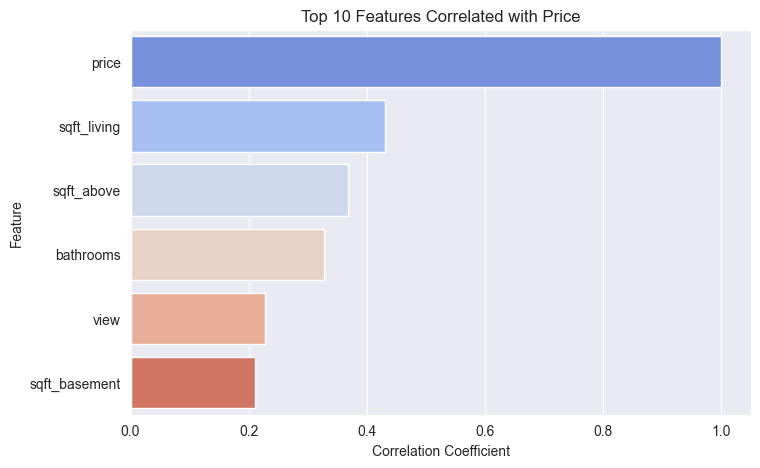

In [13]:
print("\n-------------------------\n")
print("Correlation Heatmap:")
print("\n-------------------------\n")
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Feature Correlation with Price")
plt.show()

price_corr = corr["price"].sort_values(ascending=False)
print("\n Top correlated features with price:")
print(price_corr.head(6))

plt.figure(figsize=(8, 5))
sns.barplot(x=price_corr.head(6).values, y=price_corr.head(6).index, palette="coolwarm")
plt.title("Top 10 Features Correlated with Price")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.show()# show top 10

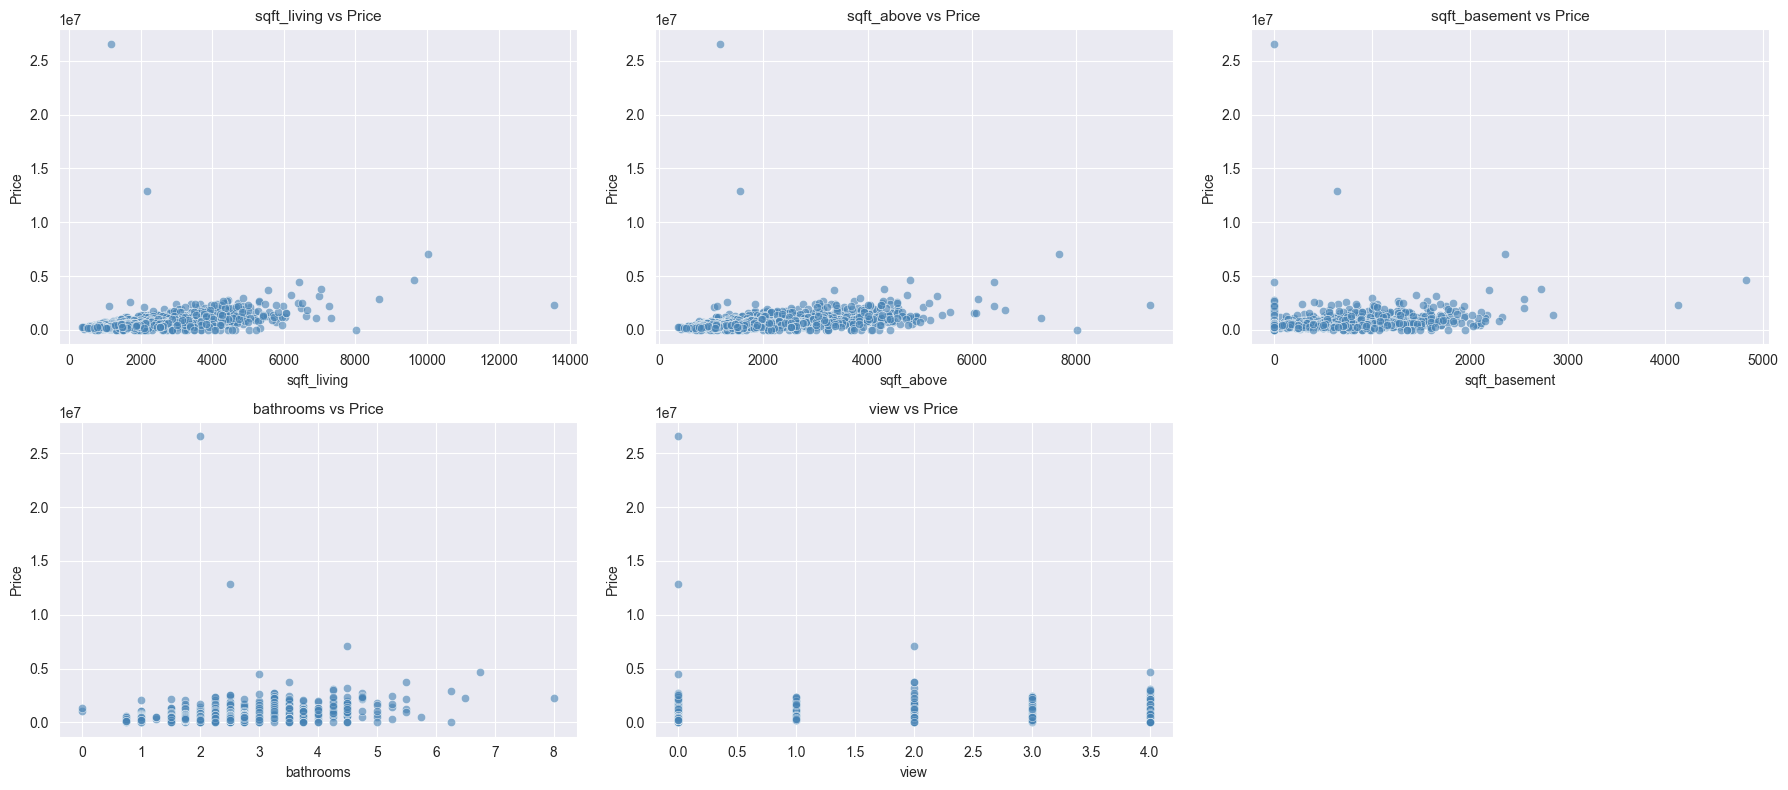

In [14]:
features = ["sqft_living", "sqft_above", "sqft_basement", "bathrooms", "view",]

fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes = axes.flatten()  # make indexing easier

for i, feature in enumerate(features):
    sns.scatterplot(ax=axes[i], x=feature, y="price", data=df, alpha=0.6, color="steelblue")
    axes[i].set_title(f"{feature} vs Price", fontsize=11)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Price")

# Hide unused subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## 02 Data Preparation

In [17]:
# # Drop non-numeric features
# df = df.drop(columns=["date", "street", "city", "statezip", "country"], errors="ignore")

df = pd.get_dummies(df, drop_first=True)
print(df.columns)
print(df.head)

# Handle missing values
df = df.fillna(df.median(numeric_only=True))




Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above',
       ...
       'statezip_WA 98155', 'statezip_WA 98166', 'statezip_WA 98168',
       'statezip_WA 98177', 'statezip_WA 98178', 'statezip_WA 98188',
       'statezip_WA 98198', 'statezip_WA 98199', 'statezip_WA 98288',
       'statezip_WA 98354'],
      dtype='object', length=4725)
<bound method NDFrame.head of              price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     3.130000e+05       3.0       1.50         1340      7912     1.5   
1     2.384000e+06       5.0       2.50         3650      9050     2.0   
2     3.420000e+05       3.0       2.00         1930     11947     1.0   
3     4.200000e+05       3.0       2.25         2000      8030     1.0   
4     5.500000e+05       4.0       2.50         1940     10500     1.0   
...            ...       ...        ...          ...       ...     ...   
4595  3.081667e+05       3.0     

In [18]:
# Split into training and testing data
X = df.drop(columns=["price"])
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training: {X_train.shape}, Test: {X_test.shape}")

Training: (3680, 4724), Test: (920, 4724)


## 03 Model Training

In [19]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)


-------------------------

Feature Importance:

-------------------------

sqft_living                         0.486277
statezip_WA 98004                   0.049571
waterfront                          0.041618
yr_built                            0.034963
sqft_lot                            0.029058
                                      ...   
street_1981 24th Ave NE             0.000000
street_19827 SE Maple Valley Hwy    0.000000
street_19851 NE Redmond Rd          0.000000
street_1987 Shenandoah Dr E         0.000000
statezip_WA 98354                   0.000000
Length: 4724, dtype: float64


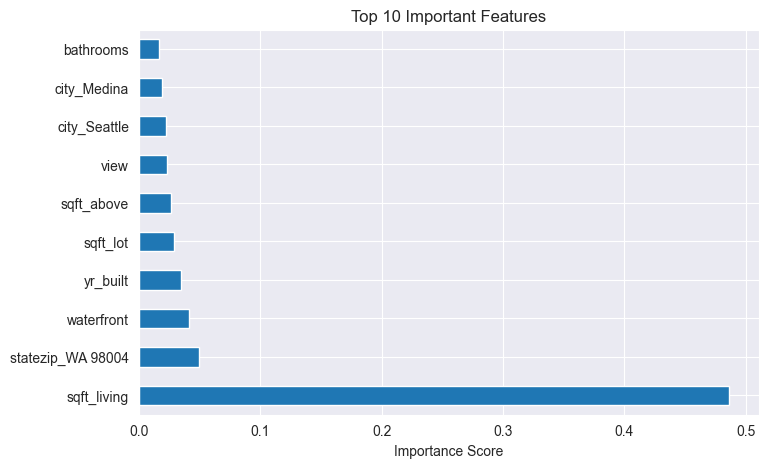

In [23]:
feature_importance = pd.Series(dt.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\n-------------------------\n")
print("Feature Importance:")
print("\n-------------------------\n")
print(feature_importance)

feature_importance.head(10).plot(kind='barh', figsize=(8, 5))
plt.title("Top 10 Important Features")
plt.xlabel("Importance Score")
plt.show()

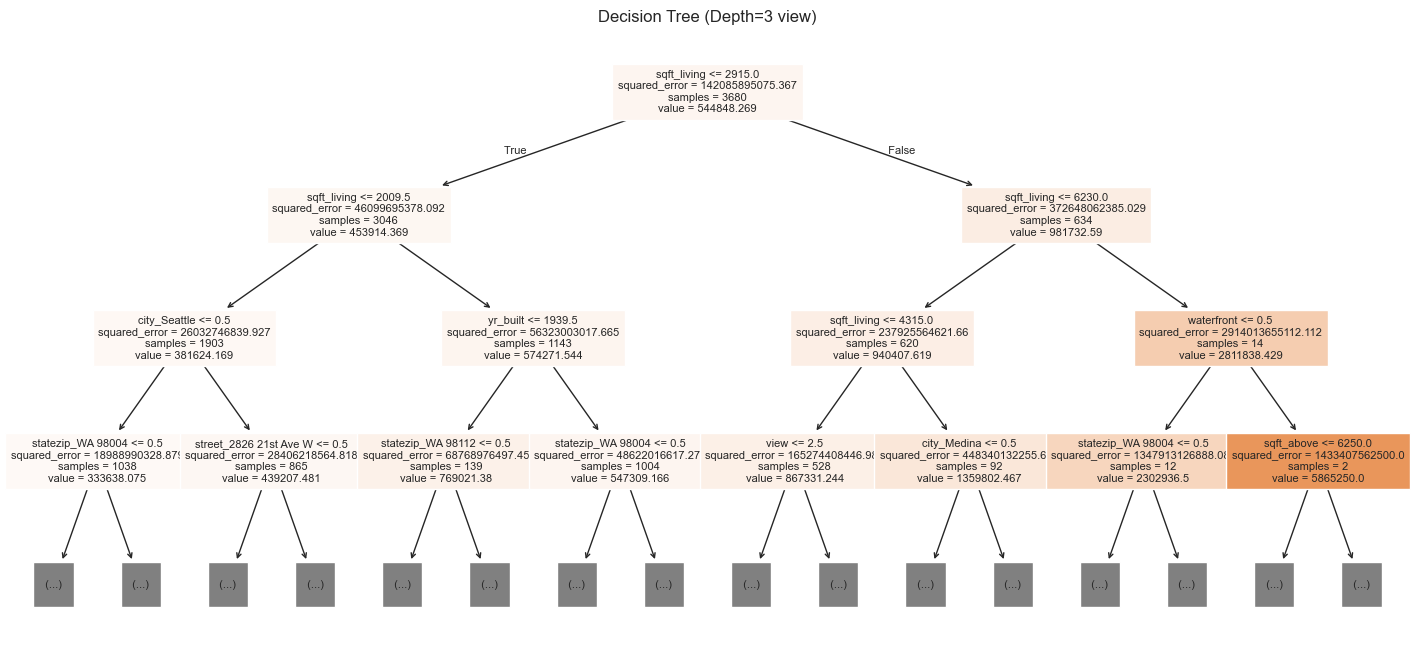

In [22]:
# Plot tree

plt.figure(figsize=(18, 8))
plot_tree(dt, feature_names=X.columns, filled=True, max_depth=3, fontsize=8)
plt.title("Decision Tree (Depth=3 view)")
plt.show()

# 04 Model Evaluation

In [42]:
print("\n-------------------------\n")
print("Model Evaluation:")
print("\n-------------------------\n")
y_pred = dt.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")
print(f"R-squared (R²): {r2:.3f}")


-------------------------

Model Evaluation:

-------------------------

Evaluation Metrics:
Mean Absolute Error (MAE): 262,910.02
Root Mean Squared Error (RMSE): 1,025,729.90
R-squared (R²): -0.032


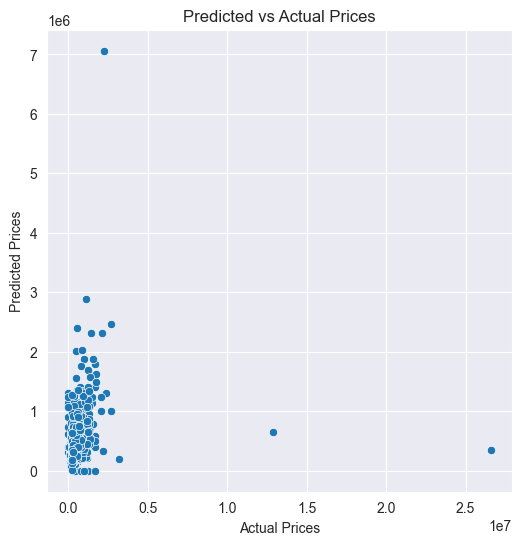

In [43]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual Prices")
plt.show()

# 05 Model Tuning

In [44]:
print("\n-------------------------\n")
print("Model Tuning:")
print("\n-------------------------\n")

for depth in [3, 5, 7, 10, 15, None]:
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(f"Depth={depth}: R²={r2_score(y_test, pred):.3f}, RMSE={np.sqrt(mean_squared_error(y_test, pred)):.0f}")


-------------------------

Model Tuning:

-------------------------

Depth=3: R²=0.016, RMSE=1001625
Depth=5: R²=0.016, RMSE=1001908
Depth=7: R²=0.016, RMSE=1001694
Depth=10: R²=0.002, RMSE=1008765
Depth=15: R²=-0.029, RMSE=1024465
Depth=None: R²=-0.032, RMSE=1025730


### Discussion

When testing different `max_depth` values (3 -> None), R² remained near 0, while RMSE stayed around 1 million.

- **Shallow trees (depth ≤ 7):** Underfit — model too simple, cannot capture housing price patterns.
- **Deeper trees (depth ≥ 10):** Overfit — model memorizes training noise, R² decreases on test data.
- **Conclusion:** Decision trees does not do too well for this dataset.

## 06 Reflection

### Feature Importance
1. **`sqft_living`** larger living areas impacts prices a lot
2. **`statezip_WA 98004`** high-value ZIP code
3. **`waterfront`** waterfront properties increases prices
4. **`yr_built`** newer homes is mor expensive
5. **`sqft_lot`**
6. **`sqft_above`**
7. **`view`**
8. **`city_Seattle`**
9. **`city_Medina`**
10. **`bathrooms`**


### Model and Data Improvement Suggestions

#### Model Enhancements
- **Use ensemble models** like `RandomForestRegressor` or `GradientBoostingRegressor` to reduce overfitting and improve R².
- **Tune hyperparameters** (`max_depth`, `min_samples_split`, `min_samples_leaf`) for optimal tree complexity.

#### Data Collection Improvements
- Add **more precise location data** (latitude/longitude).
- Add neighborhood properties school quality, crime rate.
- Add year/month of sale for market trends.
- Add pools, garages.

### Summary
Current decision tree has low predictive power (R² ≈ 0.02).

